<a href="https://colab.research.google.com/github/Isi-mrls/AST-305/blob/main/Proyecto_4_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

In [ ]:
# SEED
np.random.seed(12)

[0.15416284 0.7400497  0.26331502 0.53373939]


# IMF y distribución inicial

Recuerde cambiar el numero de estrellas en la variable **'num_stars'**

In [ ]:

def imf_sfr_gil(num_stars):
    mass_min = 0.08
    mass_max = 100.0
    t_min= 0
    t_max = 10**10
    def gil_imf(m):

        if m < 1:
           return 0.093*np.exp(-((np.log10(m)-np.log10(0.2))**2)/(2*(0.55)**2))
        else:
            return 0.041*(m**-1.35)


    star_params = []
    while len(star_params) < num_stars:
        mass = np.random.uniform(mass_min, mass_max)
        if np.random.rand() < gil_imf(mass):
            t = np.random.uniform(t_min, t_max)
            star_params.append([mass,t])
    return star_params

num_stars = 1e6
stars_params = imf_sfr_gil(num_stars)


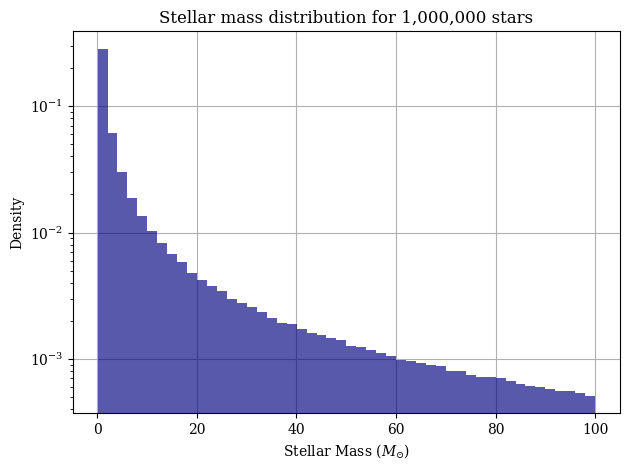

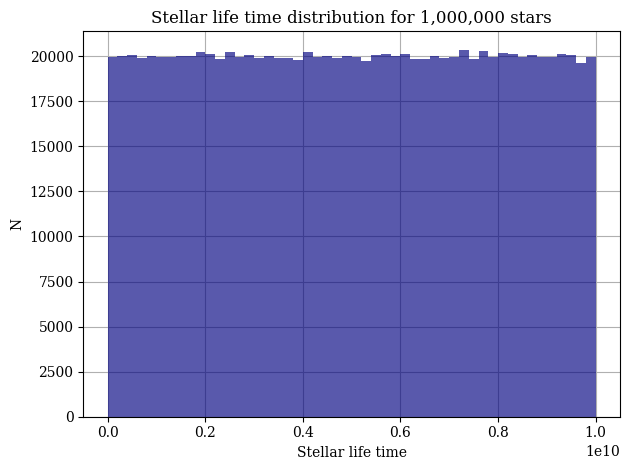

In [ ]:
# Visualizar la distribución de masas y tiempo
m_aux = []
t_aux = []
for i in range(len(stars_params)):
    m_aux.append(stars_params[i][0])
    t_aux.append(stars_params[i][1])

#Histrograma de la distribución de la masa
plt.hist(m_aux, bins=50, log=True, color='navy', histtype='barstacked', density = True, alpha = 0.65)
plt.xlabel(r'Stellar Mass $(M_{\odot})$')
plt.ylabel(r'Density')
#plt.title(f'Stellar mass distribution for {int(num_stars):.1e} stars') # Con el :.1e se pude añadir o quitar los decimales y el formato
plt.title(f'Stellar mass distribution for {int(num_stars):,} stars')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/mass_distribution_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')
plt.show()

#Histograma de la distribución del tiempo
plt.hist(t_aux, bins=50, log=False, color='navy', histtype='stepfilled', density = False, alpha = 0.65)
plt.xlabel(r'Stellar life time')
plt.ylabel(r'N')
plt.title(f'Stellar life time distribution for {int(num_stars):,} stars')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/time_distribution_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')
plt.show()

# Remanente

## Tiempo en la MS

In [ ]:
time = []
rem = []
ms = []

for i in range(len(stars_params)):
    t = (10**10)/(stars_params[i][0]**2.5)

    if stars_params[i][1] > t:
        rem.append([stars_params[i][0], stars_params[i][1]])
    else:
        ms.append([stars_params[i][0], stars_params[i][1]])
    time.append(t)

## Clasificación

In [ ]:
MS = []
MS_t = []
for i in range(len(ms)):
    MS.append(ms[i][0])
    MS_t.append(ms[i][1])


In [ ]:
WD_1 = []
NS_1 = []
BH_1 = []

WD_t = []
NS_t = []
BH_t = []

for i in range(len(rem)):
    if rem[i][0] <= 8:
        WD_1.append(rem[i][0])
        WD_t.append(rem[i][1])
        #print(f'WD: {mass_val}')
    elif 8 < rem[i][0] <= 20:
        NS_1.append(rem[i][0])
        NS_t.append(rem[i][1])
        #print(f'NS: {mass_val}')
    else:
        BH_1.append(rem[i][0])
        BH_t.append(rem[i][1])
        #print(f'BH: {mass_val}')

In [ ]:
WD = np.array(WD_1)
NS = np.array(NS_1)
BH = np.array(BH_1)

## Remanentes

In [ ]:
WD_final = []
for i in WD:
  f = (0.109*i) + 0.394
  WD_final.append(f)


In [ ]:
NS_final = []
for i in NS:
  if 8 < i <= 13:
    f = 2.24 + 0.508*(i - 14.75) + 0.125*(i -14.75)**2 + 0.0110*(i - 14.75)**3
    NS_final.append(f)
  elif 13 < i < 15:
    f = 0.123 + 0.112*i
    NS_final.append(f)
  elif 15 <= i < 17.8:
    f = 0.996 + 0.0384*i
    NS_final.append(f)
  else:
    f = -0.020 + 0.10*i
    NS_final.append(f)

In [ ]:
BH_final = []
for i in BH:
  if 20 <= i <= 40:
    c = -2.049 + 0.4140*i
    a = 15.52 - 0.3294*(i - 25.97) - 0.02121*(i - 25.97)**2 + 0.003120*(i - 25.97)**3
  else:
    c = 5.697 + (7.8598 * (10**8))*((i)**(-4.858))
    a = 0
  f = 0.9 *c + (1-0.9)*a
  BH_final.append(f)

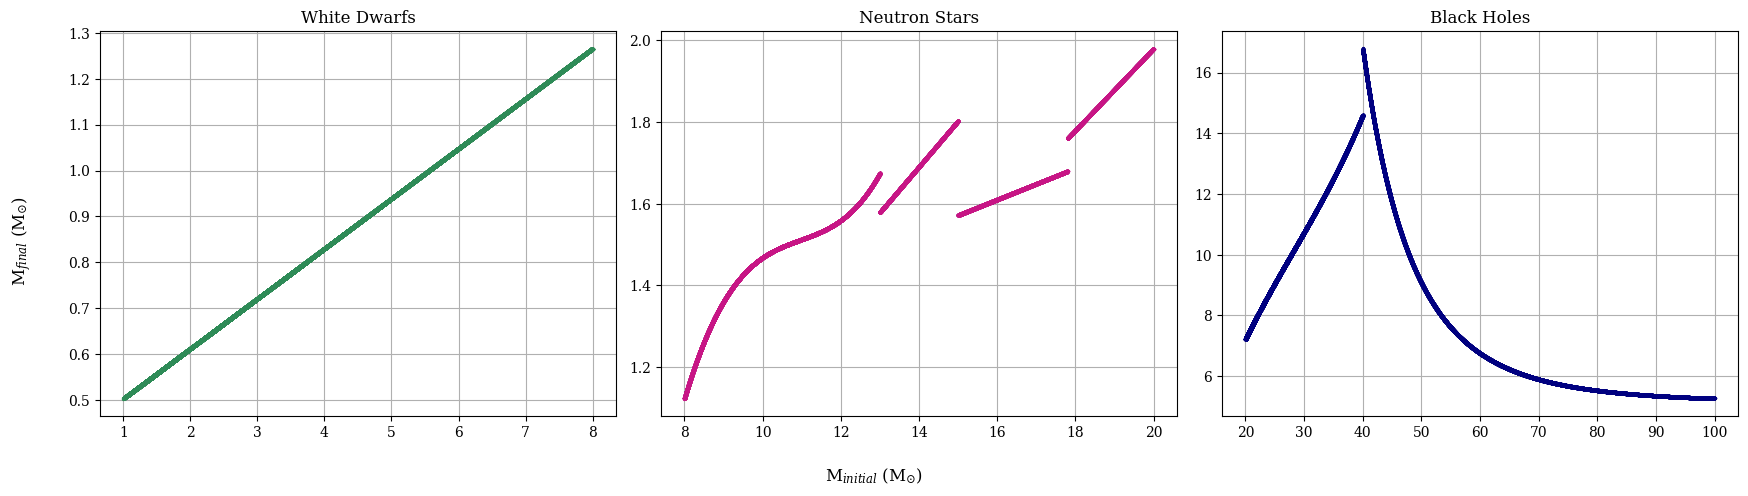

In [ ]:
#Separadas
fig, ax = plt.subplots(ncols = 3, figsize=(18,5) )
ax[0].scatter(WD, WD_final, s = 2, c = 'seagreen')
ax[0].set_title('White Dwarfs')
ax[0].grid()
ax[0].set_axisbelow(True)
ax[1].scatter(NS, NS_final, s = 2, c = 'mediumvioletred')
ax[1].set_title('Neutron Stars')
ax[1].grid()
ax[1].set_axisbelow(True)
ax[2].scatter(BH, BH_final, s = 2, c = 'navy')
ax[2].set_title('Black Holes')
ax[2].grid()
ax[2].set_axisbelow(True)
fig.supxlabel(r'M$_{initial}$ (M$_{\odot}$)')
fig.supylabel(r'M$_{final}$ (M$_{\odot}$)')
plt.tight_layout()
plt.subplots_adjust(left=0.07, right=0.98, top=0.92, bottom=0.15)
plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/residual_mass_separadas_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')
plt.show()

/tmp/ipython-input-3385557994.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/residual_mass_all_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')


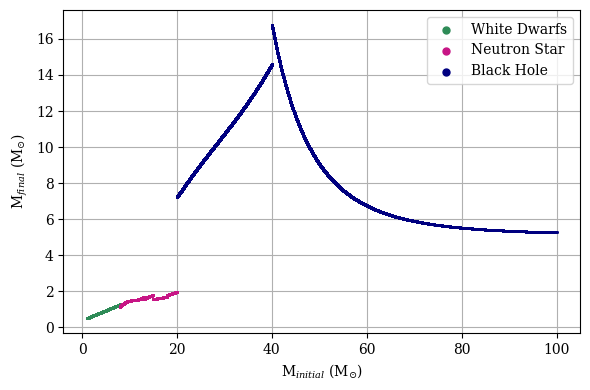

In [ ]:
#Las 3 juntas
plt.figure(figsize=(6,4))
plt.scatter(WD, WD_final, label = 'White Dwarfs', s = 1, c = 'seagreen')
plt.scatter(NS, NS_final, label = 'Neutron Star', s = 1, c = 'mediumvioletred')
plt.scatter(BH, BH_final, label = 'Black Hole', s = 1, c = 'navy')
plt.xlabel(r'M$_{initial}$ (M$_{\odot}$)')
plt.ylabel(r'M$_{final}$ (M$_{\odot}$)')
plt.legend(markerscale = 5)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/residual_mass_all_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')
plt.show()

# Plot extra

In [ ]:
mass_aux = np.linspace(0.01, 100, 1000)
imf_aux = []
for masses in mass_aux:
    if masses < 1:
        imf_aux.append(0.093*np.exp(-((np.log10(masses)-np.log10(0.2))**2)/(2*(0.55)**2)))
    else:
        imf_aux.append(0.041*(masses**-1.35))

In [ ]:
kroup_aux = []
for masses in mass_aux:
    if masses < 0.5:
        kroup_aux.append(masses**(-1.3))
    else:
        kroup_aux.append(masses**(-2.3))

In [ ]:
#Salpeter
sal_aux = []
for masses in mass_aux:
    if 0.4 <= masses <= 10:
        sal_aux.append(masses**(-2.35))
masses_sal = interp.interp1d(np.arange(mass_aux.size), mass_aux)
masses_sal_final = masses_sal(np.linspace(0,mass_aux.size-1,len(sal_aux)))


96
96 96
0.10009009009009008


# Hist

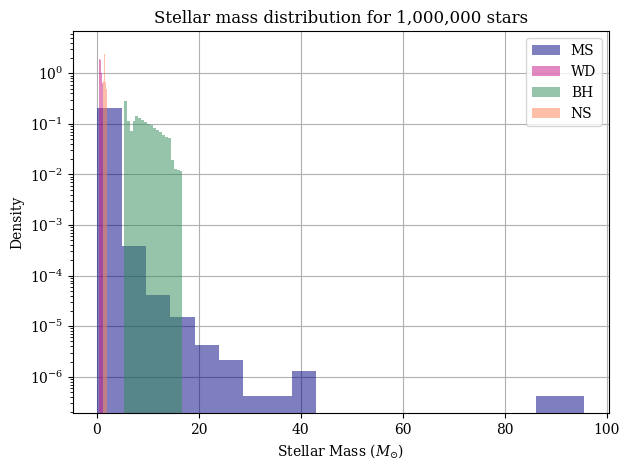

In [ ]:
plt.hist(MS, bins=20, log=True, color='navy', histtype='barstacked', density = True, alpha = 0.5, label = 'MS')
plt.hist(WD_final, bins=20, log=True, color='mediumvioletred', histtype='barstacked', density = True, alpha = 0.5, label = 'WD')
plt.hist(BH_final, bins=20, log=True, color='seagreen', histtype='barstacked', density = True, alpha = 0.5, label = 'BH')
plt.hist(NS_final, bins=20, log=True, color='coral', histtype='barstacked', density = True, alpha = 0.5, label = 'NS')
plt.xlabel(r'Stellar Mass $(M_{\odot})$')
plt.ylabel(r'Density')
plt.title(f'Stellar mass distribution for {int(num_stars):,} stars')

plt.legend(markerscale = 5)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/resid_final_mass_num_distribution_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')
plt.show()

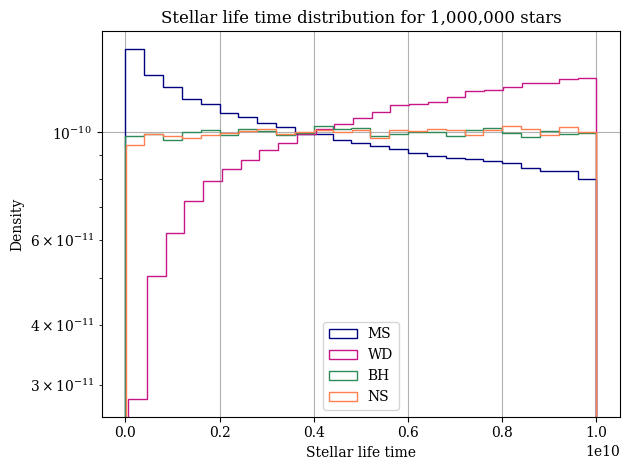

In [ ]:
plt.hist(MS_t, bins=25, log=True, color='navy', histtype='step', density = True, alpha = 1, label = 'MS')
plt.hist(WD_t, bins=25, log=True, color='mediumvioletred', histtype='step', density = True, alpha = 1, label = 'WD')
plt.hist(BH_t, bins=25, log=True, color='seagreen', histtype='step', density = True, alpha = 1, label = 'BH')
plt.hist(NS_t, bins=25, log=True, color='coral', histtype='step', density = True, alpha = 1, label = 'NS')
plt.xlabel(r'Stellar life time')
plt.ylabel(r'Density')
plt.title(f'Stellar life time distribution for {int(num_stars):,} stars')
plt.legend()
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/final_time_distribution_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')
plt.show()

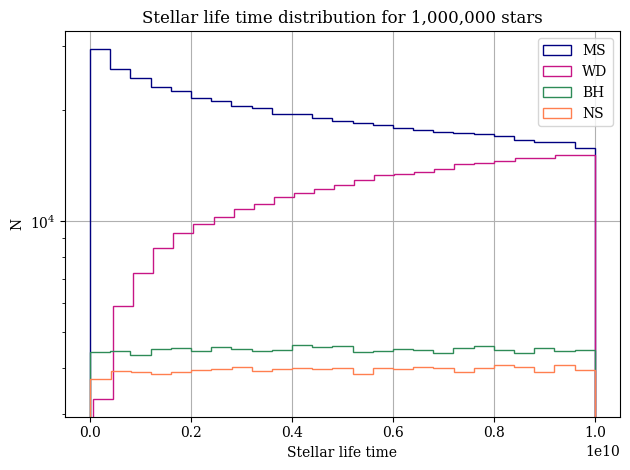

In [ ]:
plt.hist(MS_t, bins=25, log=True, color='navy', histtype='step', density = False, alpha = 1, label = 'MS')
plt.hist(WD_t, bins=25, log=True, color='mediumvioletred', histtype='step', density = False, alpha = 1, label = 'WD')
plt.hist(BH_t, bins=25, log=True, color='seagreen', histtype='step', density = False, alpha = 1, label = 'BH')
plt.hist(NS_t, bins=25, log=True, color='coral', histtype='step', density = False, alpha = 1, label = 'NS')
plt.xlabel(r'Stellar life time')
plt.ylabel(r'N')
plt.title(f'Stellar life time distribution for {int(num_stars):,} stars')
plt.legend()
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/proyecto_4/Plots/millon/final_time_num_dist_{int(num_stars)}_stars.png', dpi=500, bbox_inches='tight')
plt.show()

# Fracciones

In [ ]:
print('PARA MILLON')
print(f'Fracción de Black Holes: {(len(BH)/num_stars*100):.2f} %')
print(f'Fracción de Neutron stars: {(len(NS)/num_stars*100):.2f} %')
print(f'Fracción de White Dwarfs: {(len(WD)/num_stars*100):.2f} %')
print(f'Fracción de estrellas en la Main Sequence: {(len(ms)/num_stars*100):.2f} %')

PARA MILLON
Fracción de Black Holes: 11.22 %
Fracción de Neutron stars: 9.90 %
Fracción de White Dwarfs: 29.54 %
Fracción de estrellas en la Main Sequence: 49.33 %
